In [ ]:
#emotion detection with MobileNet

In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2023-03-09 09:12:29--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2023-03-09 09:12:29--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca5dd20ae5430f79e8141c99a6e.dl.dropboxusercontent.com/cd/0/inline/B34UGZjHRC5UTfaI3-hYapgIyO6KisrvAq-TKCra9UcU2eW2ZoBjwq6sPFH1HXKT7ONaXMZObXq5DwBiUnjt5cTXfD2tHyNV06pjUgdeHYbTbyCBEhC6ouHZf5H_mUJ4HBBIv9C-coWUWqUg_QPeq7ISUY2x6OPLNj9BdylP3mX4RQ/file# [following]
--2023-03-09 09:12:29--  https://uca5dd20ae5430f79e8141c99a6e.dl.dropboxusercontent.com/cd/0/inline/B34UGZjHRC5UTfaI3-hYapgIyO6KisrvAq-TKCra9UcU2eW2ZoBjwq6sPFH1HXKT7ONaXMZObXq5Dw

In [2]:
!unzip dataset.zip?dl=0

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model

In [4]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip uninstall keras
!pip install keras

Found existing installation: keras 2.11.0
Uninstalling keras-2.11.0:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/keras-2.11.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/keras/*
Proceed (Y/n)? y
  Successfully uninstalled keras-2.11.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.0 MB/s eta 0:00:00


In [11]:
from tensorflow.keras.utils import img_to_array,load_img

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [13]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [14]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy'])

In [15]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [16]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


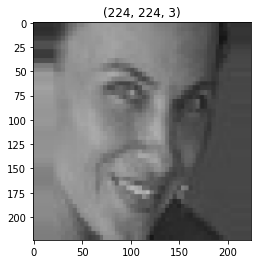

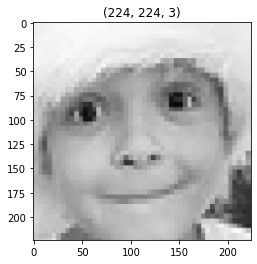

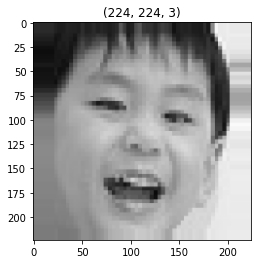

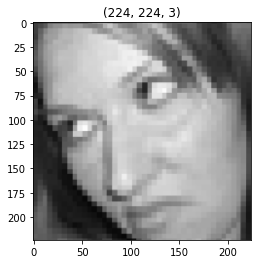

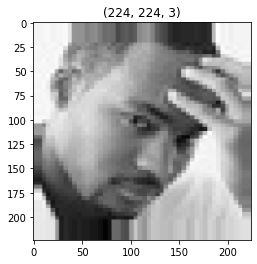

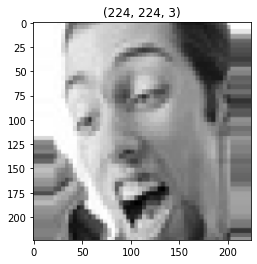

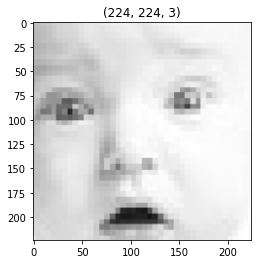

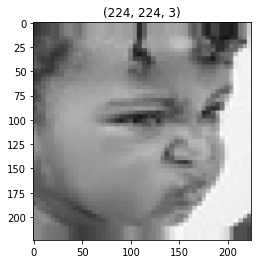

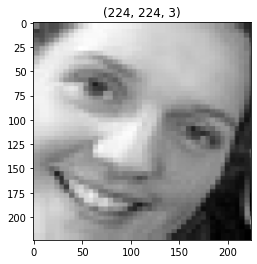

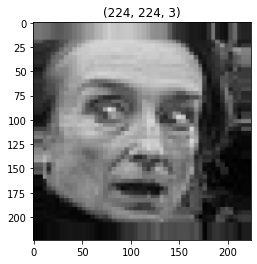

In [17]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [18]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [19]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

<ipython-input-19-f681b3c69731>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 16.4145 - accuracy: 0.2188
Epoch 1: val_accuracy improved from -inf to 0.36328, saving model to best_model.h5
10/10 [==============================] - 49s 5s/step - loss: 16.4145 - accuracy: 0.2188 - val_loss: 15.0167 - val_accuracy: 0.3633
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 13.1884 - accuracy: 0.2812
Epoch 2: val_accuracy did not improve from 0.36328
10/10 [==============================] - 45s 4s/step - loss: 13.1884 - accuracy: 0.2812 - val_loss: 10.1007 - val_accuracy: 0.2930
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 6.8335 - accuracy: 0.3531
Epoch 3: val_accuracy did not improve from 0.36328
10/10 [==============================] - 39s 4s/step - loss: 6.8335 - accuracy: 0.3531 - val_loss: 6.2966 - val_accuracy: 0.3203
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 5.4674 - accuracy: 0.3688
Epoch 4: val_accuracy improved from 0.36328 to

In [20]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [21]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

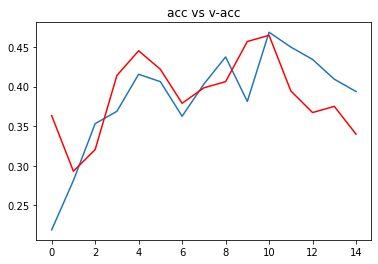

In [22]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

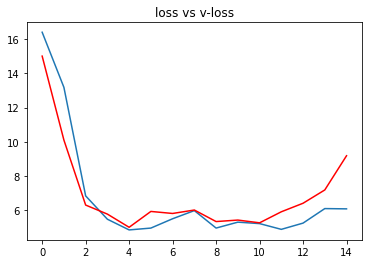

In [23]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [24]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 1s 548ms/step
 the image is of sad


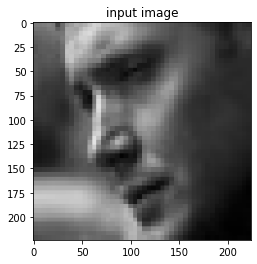

In [25]:
# path for the image to see if it predics correct class

path = "/content/test/angry/PrivateTest_1054527.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

1/1 [==============================] - 0s 86ms/step
 the image is of happy


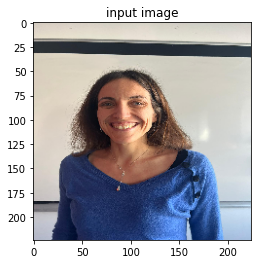

In [27]:
# path for the image to see if it predics correct class

path = "/content/Chrystelle G.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

1/1 [==============================] - 0s 69ms/step
 the image is of fear


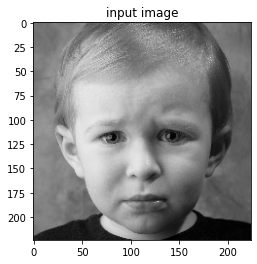

In [29]:
# path for the image to see if it predics correct class

path = "/content/boy_sad.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [32]:
#for path in '/content/emotionDetection dataset.zip' :


import zipfile

with zipfile.ZipFile('/content/emotionDetection dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('test_emotion_images')

In [54]:
model.save('my_model_MobileNet.h5')

neutral1.jpg: (275, 183) JPEG
1/1 [==============================] - 0s 77ms/step
 the image is of surprise


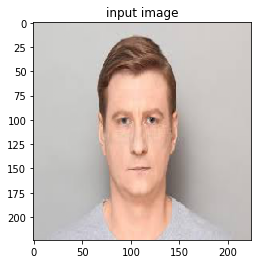

surprise3.jpg: (262, 192) JPEG
1/1 [==============================] - 0s 81ms/step
 the image is of neutral


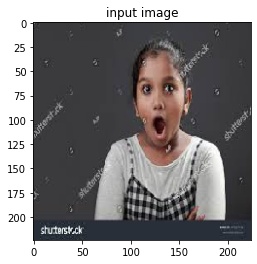

happy2.jpg: (284, 177) JPEG
1/1 [==============================] - 0s 73ms/step
 the image is of angry


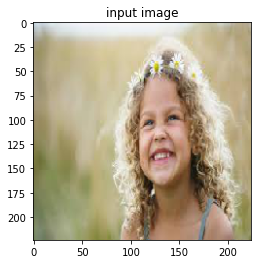

sad2.jpg: (225, 225) JPEG
1/1 [==============================] - 0s 78ms/step
 the image is of sad


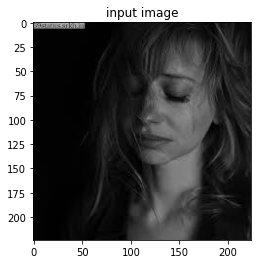

fear1.jpg: (225, 225) JPEG
1/1 [==============================] - 0s 80ms/step
 the image is of angry


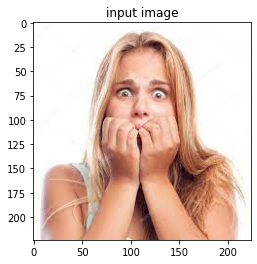

surprise2.jpg: (275, 183) JPEG
1/1 [==============================] - 0s 76ms/step
 the image is of surprise


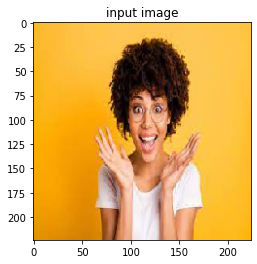

sad3.jpg: (275, 183) JPEG
1/1 [==============================] - 0s 82ms/step
 the image is of neutral


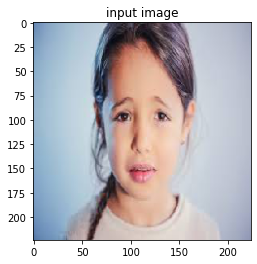

neutral4.jpg: (256, 197) JPEG
1/1 [==============================] - 0s 87ms/step
 the image is of neutral


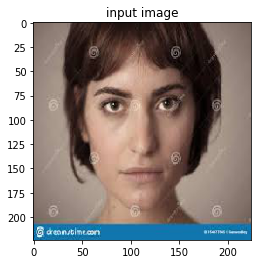

angry3.jpg: (275, 183) JPEG
1/1 [==============================] - 0s 76ms/step
 the image is of neutral


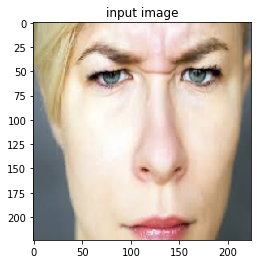

sad4.jpg: (202, 249) JPEG
1/1 [==============================] - 0s 75ms/step
 the image is of fear


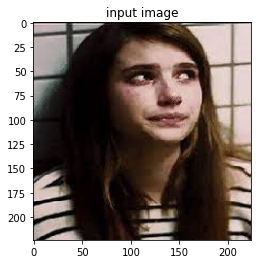

angry1.jpg: (239, 211) JPEG
1/1 [==============================] - 0s 75ms/step
 the image is of neutral


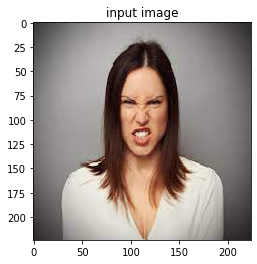

neutral2.jpg: (612, 529) JPEG
1/1 [==============================] - 0s 73ms/step
 the image is of sad


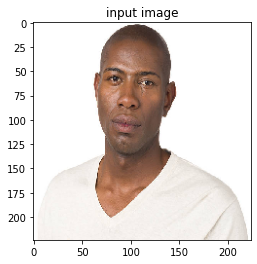

neutral3.jpg: (275, 183) JPEG
1/1 [==============================] - 0s 82ms/step
 the image is of surprise


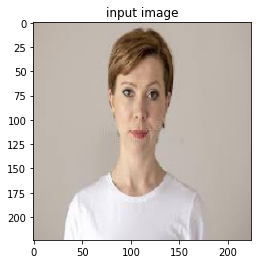

surprise5.jpg: (221, 228) JPEG
1/1 [==============================] - 0s 71ms/step
 the image is of sad


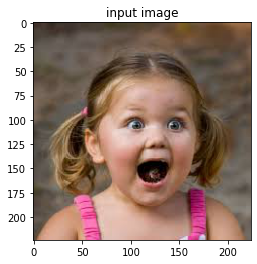

fear4.jpg: (198, 254) JPEG
1/1 [==============================] - 0s 79ms/step
 the image is of surprise


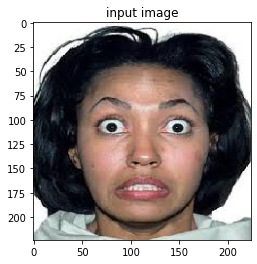

sad1.jpg: (183, 275) JPEG
1/1 [==============================] - 0s 76ms/step
 the image is of happy


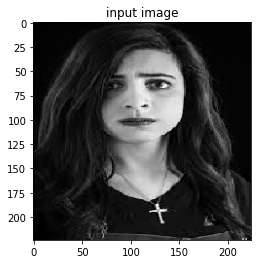

sad5.jpg: (346, 146) JPEG
1/1 [==============================] - 0s 76ms/step
 the image is of neutral


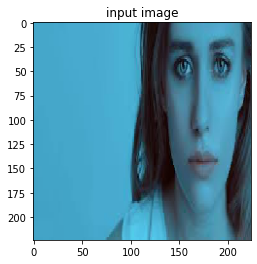

surprise1.jpg: (259, 194) JPEG
1/1 [==============================] - 0s 78ms/step
 the image is of surprise


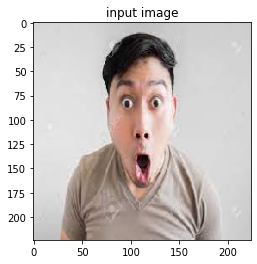

surprise4.jpg: (251, 201) JPEG
1/1 [==============================] - 0s 91ms/step
 the image is of neutral


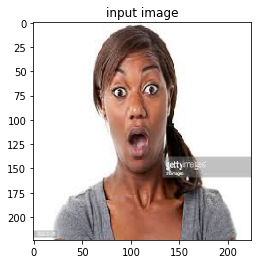

angry4.jpg: (300, 168) JPEG
1/1 [==============================] - 0s 123ms/step
 the image is of surprise


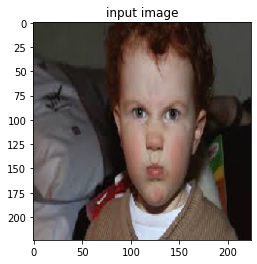

angry2.jpg: (275, 183) JPEG
1/1 [==============================] - 0s 111ms/step
 the image is of surprise


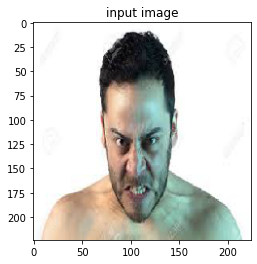

happy3.jpg: (269, 187) JPEG
1/1 [==============================] - 0s 108ms/step
 the image is of neutral


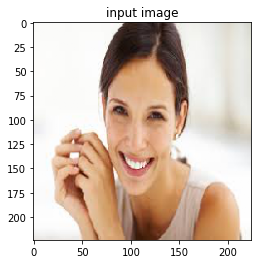

fear2.jpg: (275, 183) JPEG
1/1 [==============================] - 0s 108ms/step
 the image is of neutral


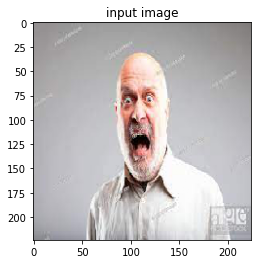

fear3.jpg: (300, 168) JPEG
1/1 [==============================] - 0s 118ms/step
 the image is of surprise


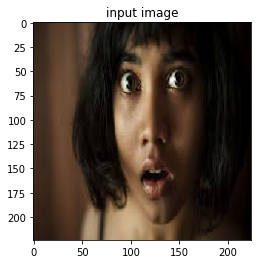

happy1.jpg: (286, 176) JPEG
1/1 [==============================] - 0s 106ms/step
 the image is of angry


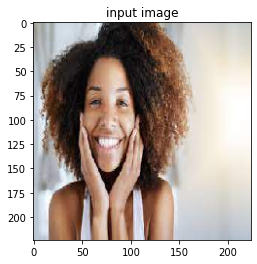

In [53]:
import os
from PIL import Image

# Set the directory path
dir_path = '/content/test_emotion_images/emotionDetection dataset'

# Loop through all the files in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.jpg'):
        # Open the image file
        img = Image.open(os.path.join(dir_path, filename))
        # Print the image size and format
        print(f'{filename}: {img.size} {img.format}')
        # Show the image
        #img.show()
        img_name = f'{filename}: {img.size} {img.format}'
        #print(f'{dir_path}/{img_name}')
        #path = "/content/train/angry/Training_10131352.jpg"
        path = f'{dir_path}/{filename}'
        img = load_img(path, target_size=(224,224) )

        i = img_to_array(img)/255
        input_arr = np.array([i])
        input_arr.shape

        pred = np.argmax(model.predict(input_arr))

        print(f" the image is of {op[pred]}")

        # to display the image  
        plt.imshow(input_arr[0])
        plt.title("input image")
        plt.show()


# TERRIBLE results


1/1 [==============================] - 0s 231ms/step
 the image is of happy


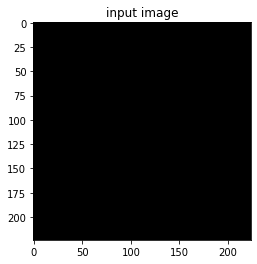

In [43]:
path = "/content/train/angry/Training_10131352.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [41]:
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# Define constants
FACE_DETECTOR_PATH = "haarcascade_frontalface_default.xml"
MODEL_PATH = "emotion_detection_model.h5"
EMOTIONS = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

# Load the pre-trained face detector and emotion detection model
face_detector = cv2.CascadeClassifier(FACE_DETECTOR_PATH)
emotion_detector = load_model(MODEL_PATH)

# Start the webcam
webcam = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = webcam.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Loop over all detected faces
    for (x, y, w, h) in faces:
        # Extract the face ROI
        roi = gray[y:y+h, x:x+w]

        # Resize the ROI to 48x48 pixels
        roi = cv2.resize(roi, (48, 48))

        # Convert the ROI to a Keras-compatible array
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        roi /= 255

        # Make a prediction on the ROI using the emotion detection model
        predictions = emotion_detector.predict(roi)[0]
        emotion_probability = np.max(predictions)
        emotion_label = EMOTIONS[predictions.argmax()]

        # Draw the predicted emotion label and probability on the frame
        cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(frame, str(emotion_probability), (x + w, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Display the resulting frame
    cv2.imshow('Emotion Detection', frame)

    # Stop the program when the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
webcam.release()
cv2.destroyAllWindows()

ImportError: ignored

DisabledFunctionError: ignored

In [56]:
import cv2
from tensorflow import keras
import numpy as np

# Load the trained model
#model = keras.models.load_model('path/to/trained/model.h5')
model = load_model('my_model_MobileNet.h5')

# Load the face and eye cascades
face_cascade = cv2.CascadeClassifier('path/to/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('path/to/haarcascade_eye.xml')

# Open the webcam
cap = cv2.VideoCapture(0)

# Loop through frames from the webcam
while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Detect faces in the frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Loop through detected faces
    for (x, y, w, h) in faces:
        # Crop the face region
        face = frame[y:y+h, x:x+w]

        # Resize the face to the input size of the model
        face = cv2.resize(face, (224, 224))

        # Preprocess the face for the model
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face = face.astype('float32') / 255.0
        face = np.expand_dims(face, axis=0)

        # Pass the face through the model to obtain the predicted emotion
        emotion_probabilities = model.predict(face)[0]
        emotion_label = np.argmax(emotion_probabilities)

        # Display the predicted emotion label on the frame
        emotion_text = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][emotion_label]
        cv2.putText(frame, emotion_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the frame
    cv2.imshow('frame', frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()
